In [1]:
import pandas as pd

### Data Loading

In [20]:
dfList = []
for i in range(1,32):
    dfList.append(pd.read_json("./data/return-data/2017-01-{0:02d}.txt".format(i), lines=True))
df = pd.concat(dfList)

In [4]:
print(df.returnLabel.value_counts())
df.head()

0    30087
1      913
Name: returnLabel, dtype: int64


,basket,returnLabel,totalAmount,transactionId,zipCode
0,"[4, 0, 2, 2, 3, 4, 4, 2]",0,240,5474073760,2051
1,[2],0,79,5656265973,3394
2,"[2, 3]",0,24,8506010673,9263
3,"[4, 1, 1, 1, 5, 5]",0,504,8870992638,3976
4,"[4, 2, 0, 4, 3]",0,190,4593639361,7646


### Feature Engineering

We transform the basket into an vector which has the count of the individual categories as values

In [5]:
df['c_0'] = df.basket.map(lambda x: x.count(0))
df['c_1'] = df.basket.map(lambda x: x.count(1))
df['c_2'] = df.basket.map(lambda x: x.count(2))
df['c_3'] = df.basket.map(lambda x: x.count(3))
df['c_4'] = df.basket.map(lambda x: x.count(4))
df['c_5'] = df.basket.map(lambda x: x.count(5))

In [6]:
df.head()

,basket,returnLabel,totalAmount,transactionId,zipCode,c_0,c_1,c_2,c_3,c_4,c_5
0,"[4, 0, 2, 2, 3, 4, 4, 2]",0,240,5474073760,2051,1,0,3,1,3,0
1,[2],0,79,5656265973,3394,0,0,1,0,0,0
2,"[2, 3]",0,24,8506010673,9263,0,0,1,1,0,0
3,"[4, 1, 1, 1, 5, 5]",0,504,8870992638,3976,0,3,0,0,1,2
4,"[4, 2, 0, 4, 3]",0,190,4593639361,7646,1,0,1,1,2,0


In [7]:
df["zipCode"] = df["zipCode"].astype('category',categories=list(range(1000,10000)))
dummies = pd.get_dummies(df.zipCode)

/Users/pbaier/anaconda3/envs/analyse/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [8]:
dummies.shape

(31000, 9000)

In [9]:
df2 = pd.concat([df, dummies], axis=1)

In [10]:
df3 = df2.drop(["basket", "zipCode", "transactionId"], axis=1)

In [11]:
df3.head()

,returnLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,1000,1001,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,240,1,0,3,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,79,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,24,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,504,0,3,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,190,1,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model training

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df3, test_size=0.3, random_state=0)
# save data to csv
train.to_pickle("./data/train.pickle")
test.to_pickle("./data/test.pickle")
train.head()

,returnLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,1000,1001,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
281,0,148,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,708,3,1,2,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
273,0,744,2,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
725,0,160,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
55,0,304,1,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train = train[train.columns[1:]]
y_train = train["returnLabel"]
X_test = test[test.columns[1:]]
y_test = test["returnLabel"]
X_train.shape

(21700, 9007)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Model evaluation

In [16]:
test_scores_reg = logreg.predict_proba(X_test)
test_scores_gbt = gbt.predict_proba(X_test)

In [17]:
from sklearn import metrics
fpr_reg, tpr_reg, _ =  metrics.roc_curve(y_test, test_scores_reg[:,1])
auc_reg = metrics.auc(fpr_reg, tpr_reg)
fpr_gbt, tpr_gbt, _ =  metrics.roc_curve(y_test, test_scores_gbt[:,1])
auc_gbt = metrics.auc(fpr_gbt, tpr_gbt)

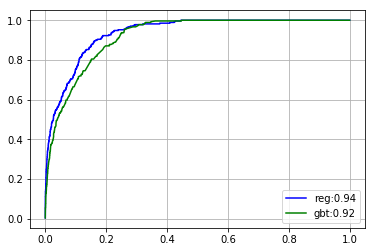

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_reg, tpr_reg, color = 'blue', label = "reg:{:.2f}".format(auc_reg))
plt.plot(fpr_gbt, tpr_gbt, color = 'green', label = "gbt:{:.2f}".format(auc_gbt))
plt.legend()
plt.grid()
plt.show()

### Save predictions on test and train data for modelCalibration

In [19]:
# save test predictions to csv
df = pd.DataFrame(data={'label': y_test, 'predReg': test_scores_reg[:,1], 
                  'predGbt': test_scores_gbt[:,1] })
df.to_csv("./data/predictions.csv", index=False)

# save test predictions to csv
train_scores_reg = logreg.predict_proba(X_train)
train_scores_gbt = gbt.predict_proba(X_train)
df = pd.DataFrame(data={'label': y_train, 'predReg': train_scores_reg[:,1], 
                  'predGbt': train_scores_gbt[:,1] })
df.to_csv("./data/predictions_train.csv", index=False)